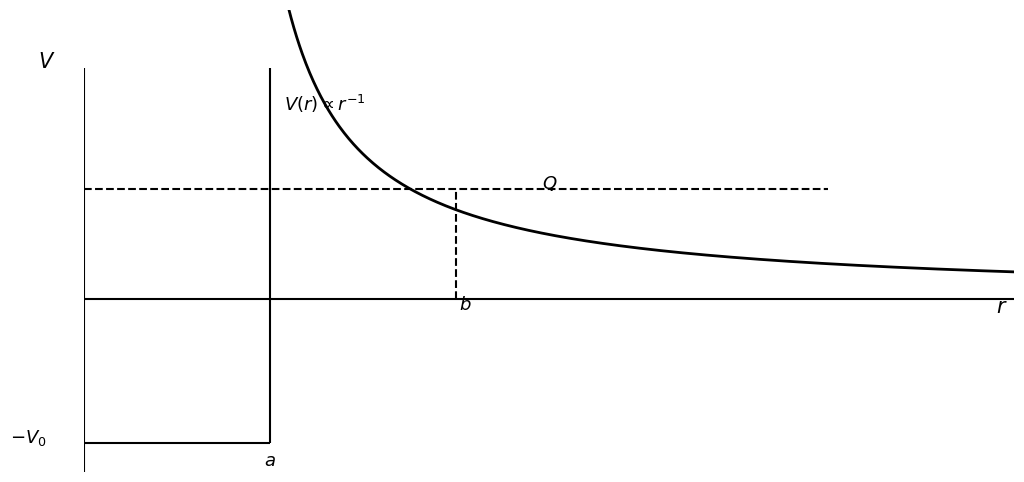

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
r=np.linspace(0,10,1000)
Vtail=8/(r-1.4)
Vtail[r<2]=np.nan
plt.plot(r[Vtail>0],Vtail[Vtail>0],'k',lw=2)
plt.vlines(2,-5,8,colors='k')
plt.hlines(-5,0,2,colors='k')
plt.hlines(0,0,10,colors='k')
plt.text(2.15,6.5,r'$V(r)\propto r^{-1}$',fontsize=13)
plt.text(2,-5.8,'$a$',ha='center',fontsize=13)
plt.text(4.1,-0.4,'$b$',ha='center',fontsize=13)
plt.text(5,3.8,'$Q$',ha='center',fontsize=13)
plt.hlines(3.8,0,8,colors='k',linestyle='--')
plt.vlines(4,0,3.8,colors='k',linestyle='--')
plt.vlines(0,-6,8,colors='k')

plt.text(-0.5,8,'$V$',fontsize=15)
plt.text(9.8,-0.5,'$r$',fontsize=15)
plt.text(-0.8,-5,'$-V_0$',fontsize=13)
plt.xlim(0,10);plt.ylim(-6,10);plt.axis('off');plt.show()


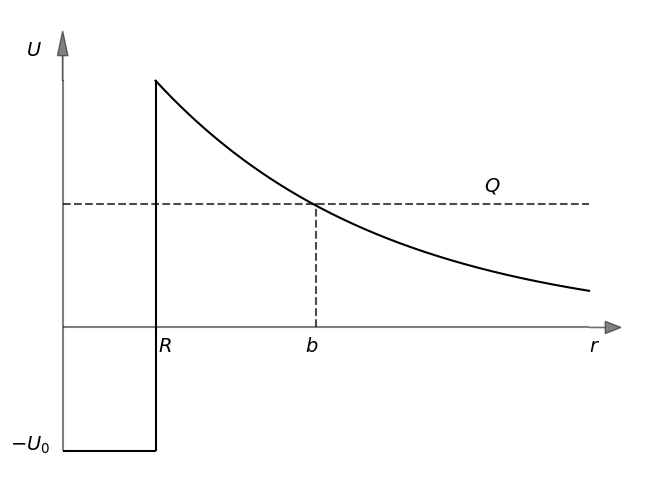

In [87]:
import scipy.integrate as si
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sc
import scipy.special as ss

#Defining several constants that are to be used
r0 = lambda A : 1.4*A**(1./3.)
hbarc = 197.3269788 # hbarc in MeV fm
md = 1875.61294257 # mass of deuteron in MeV/c^2
mn = 939.5 # mass of neutron
epsi = 2.225 # binding energy of the deuteron
R = r0(2)
red_m = mn/2 # reduced mass -- total mass is 2M and reduced mass is M/2
mhbar = 2.*mn/hbarc**2
# defining k and kappa

k = lambda U : np.sqrt(2*red_m*(U-epsi))/hbarc
kappa =  np.sqrt(2*red_m*epsi)/hbarc

f = lambda U : k(U)*np.cos(k(U)*R)/np.sin(k(U)*R)+kappa

fsol = sc.root_scalar(f, bracket=[25,50])

### Plotting the wavefunction of the deuteron
U0=45 # from the solution in the previous box
udoubldif_in = lambda r : k(U0)**2*np.sin(k(U0)*r)
udoubldif_out = lambda r : kappa**2*np.exp(-kappa*r)

def uin(r):
    return udoubldif_in(r)+k(U0)*np.sin(k(U0)*r)
a=14
def uout(r):
    return a*udoubldif_out(r)+a*kappa**2*np.exp(-kappa*r)

r1 = np.arange(0,R,0.01)
r2 = np.arange(R, 10,0.01)
plt.figure(figsize=(8,6))
#plt.plot(r1, uin(r1)/uin(R), label='Inside wavefunction')
plt.plot(r2,uout(r2), label='Outside wavefunction', color='k')
plt.vlines(R, 0, 1, ls='-', alpha=1, color='k', label=f'R={np.round(R,2)} fm')
plt.xlabel('r', fontsize=14)
plt.ylabel('U', fontsize=14)
plt.hlines(-0.5, 0, R, color='k')
plt.hlines(0.5,0, 10, color='k', ls='--', alpha=0.7)
plt.vlines(4.8,0, 0.505, color='k', ls='--', alpha=0.7)

plt.vlines(R, 0, -0.5, color='k', label=f'Potential well at U0={U0} MeV')
plt.hlines(0, 0, 10, color='black', alpha=0.5)
plt.vlines(0, -0.5, 1, color='black', alpha=0.5)
plt.yticks([])
plt.xticks([])
plt.text(R+0.05, -0.1, r"$R$", fontsize=14)
plt.text(0-1, -0.5, r"$-U_0$", fontsize=14)
plt.text(0-0.7, 1.1, r"$U$", fontsize=14)
plt.text(10, -0.1, r"$r$", fontsize=14)
plt.text(8, +0.55, r"$Q$", fontsize=14)
plt.text(4.6, -0.1, r"$b$", fontsize=14)
plt.arrow(10,0,0.3,0,width=0.001,head_width=0.05,head_length=0.3,fc='black',ec='black',alpha=0.5)
plt.arrow(0,1,0,0.1,width=0.01,head_width=0.2,head_length=0.1,fc='black',ec='black',alpha=0.5)

plt.axis('off')
plt.savefig("Coulomb.pdf")
#plt.legend()
